# MOVIE REVENUE PREDICTION

In [1]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/project-dataset/movies_latest.csv',encoding ='ISO-8859-1')

In [4]:
data.shape

(722932, 20)

In [5]:
pd.options.display.float_format = '{:.0f}'.format

In [6]:
data['release_date'] = pd.to_datetime(data['release_date'])

#### Apply filter to filter the useful and relevant dat from the dataset

In [7]:
df=data[(data.original_language=='en')&(data.status == 'Released')&(data.release_date>='2000')& (data.release_date<='2023')&(data.revenue>100000)]

##EDA

In [8]:
df.shape

(5248, 20)

In [9]:
df.isna().sum()

id                        0
title                     0
genres                   41
original_language         0
overview                  9
popularity                0
production_companies    221
release_date              0
budget                    0
revenue                   0
runtime                   2
status                    0
tagline                 686
vote_average              0
vote_count                0
credits                  26
keywords                362
poster_path              26
backdrop_path           204
recommendations         808
dtype: int64

In [10]:
df.genres.nunique()

1267

In [11]:
df.production_companies.nunique()

4589

In [12]:
df.credits.nunique()

5159

In [13]:
df.head(3)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,76600,Avatar: The Way of Water,Science Fiction-Adventure-Action,en,Set more than a decade after the events of the...,9367,20th Century Studios-Lightstorm Entertainment,2022-12-14,350000000,2312335665,192,Released,Return to Pandora.,8,6748,Sam Worthington-Zoe SaldaÃ±a-Sigourney Weaver-...,loss of loved one-dying and death-alien life-f...,/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg,/s16H6tpK2utvwDtzZ8Qy4qm5Emw.jpg,183392-111332-702432-505642-1064215-436270-874...
6,505642,Black Panther: Wakanda Forever,Action-Adventure-Science Fiction,en,Queen Ramonda Shuri MâBaku Okoye and the Dor...,2525,Marvel Studios,2022-11-09,250000000,858535561,162,Released,Forever.,7,3922,Letitia Wright-Lupita Nyong'o-Danai Gurira-Win...,loss of loved one-hero-sequel-superhero-based ...,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,/xDMIl84Qo5Tsu62c9DGWhmPI67A.jpg,436270-829280-76600-56969-312634-1037858-238-5...
8,315162,Puss in Boots: The Last Wish,Animation-Adventure-Comedy-Family,en,Puss in Boots discovers that his passion for a...,2078,DreamWorks Animation-Universal Pictures,2022-12-07,90000000,463087568,103,Released,Say hola to his little friends.,8,4671,Antonio Banderas-Salma Hayek-Harvey GuillÃ©n-W...,fairy tale-talking dog-spin off-aftercreditsst...,/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,/jr8tSoJGj33XLgFBy6lmZhpGQNu.jpg,1033456-1011679-505642-1058949-100088-536554-1...


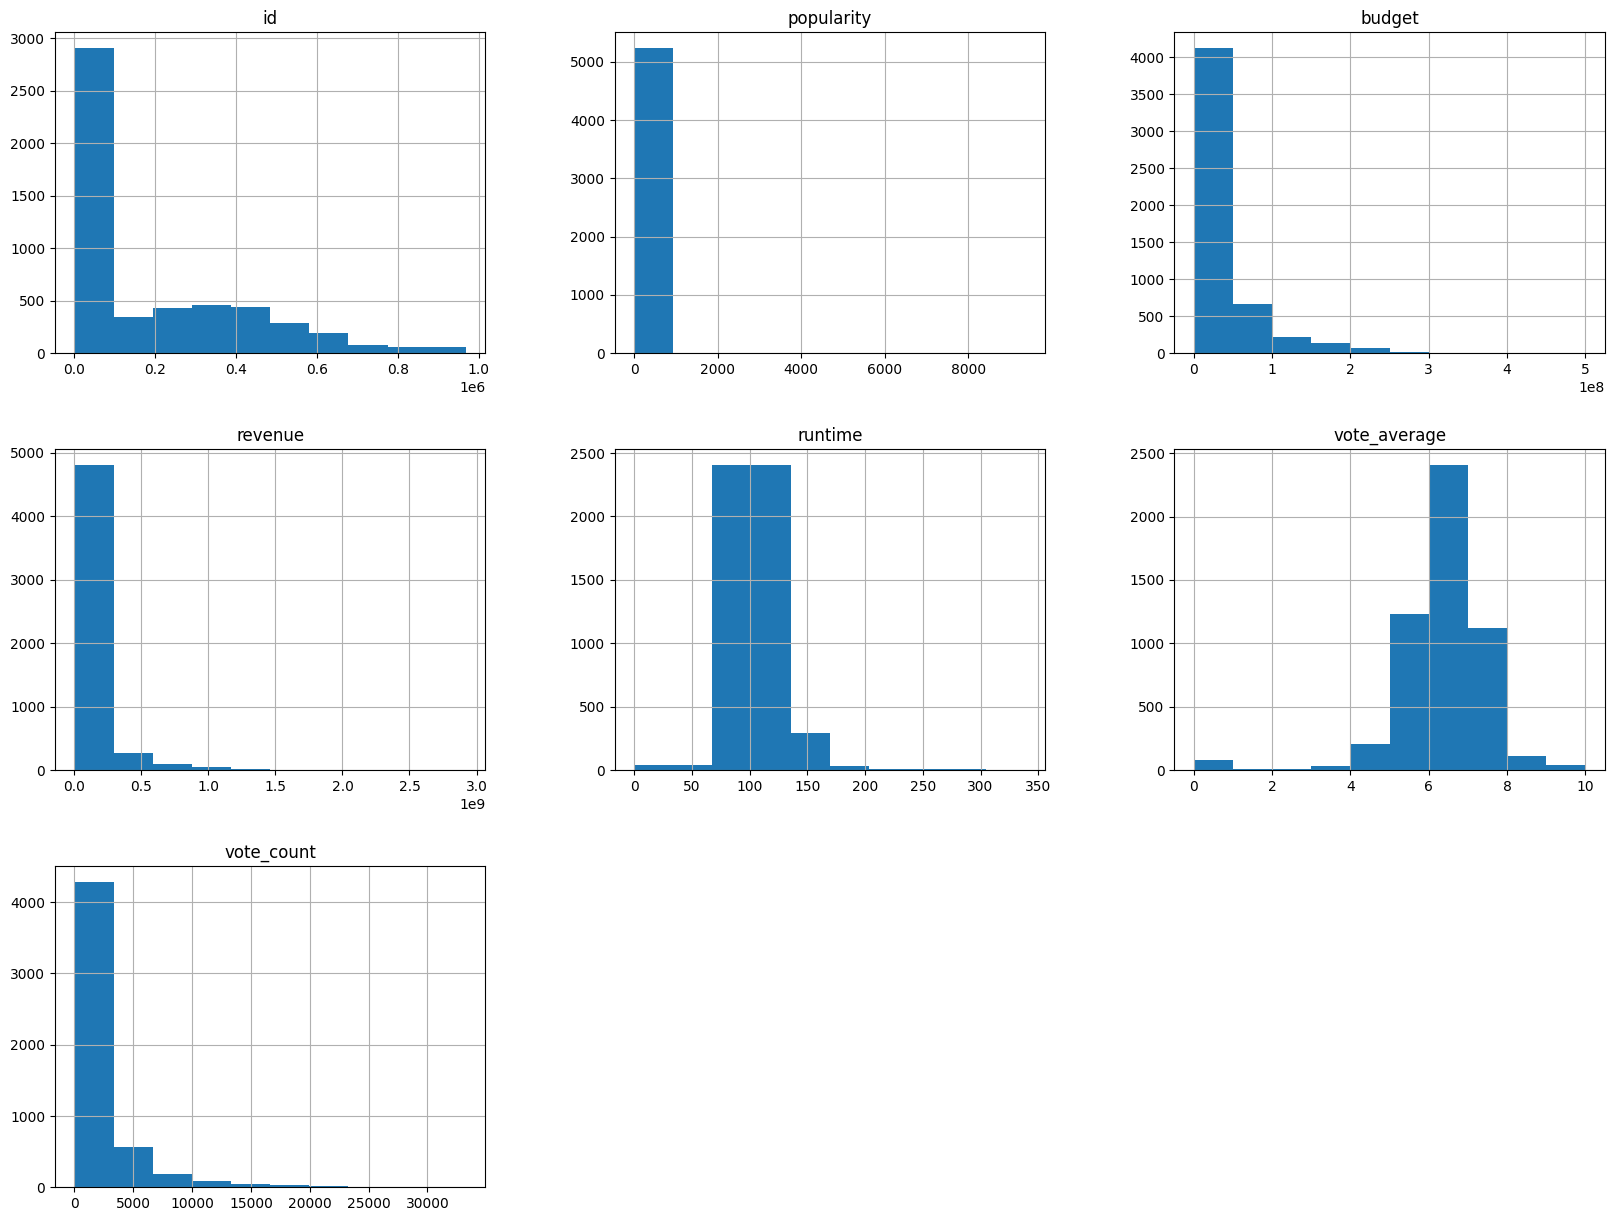

In [14]:
## Plot the distribution to decide if to take mean or median for filling the missing values
freqgraph=df.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

### Univariate Analysis

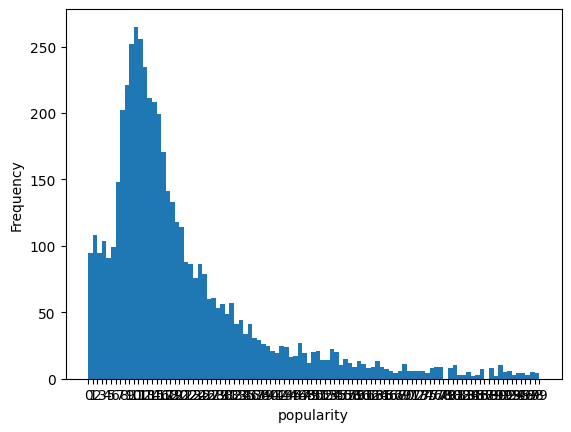

In [15]:
plt.hist(df['popularity'], bins=range(0, 100, 1))
plt.xticks(range(0, 100, 1))
plt.xlabel('popularity')
plt.ylabel('Frequency')
plt.show()

array([[<Axes: title={'center': 'release_date'}>]], dtype=object)

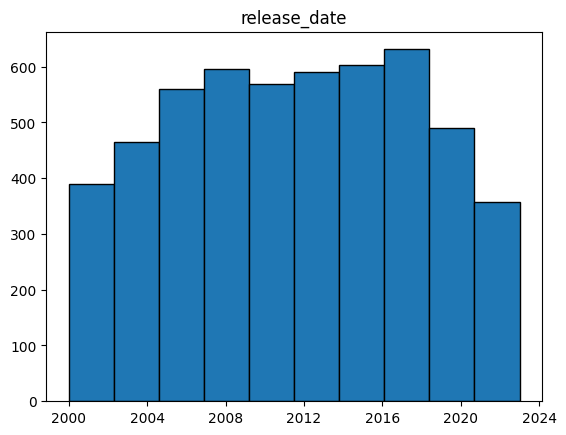

In [16]:
df.hist(column='release_date', grid=False, edgecolor='black')

array([[<Axes: title={'center': 'budget'}>]], dtype=object)

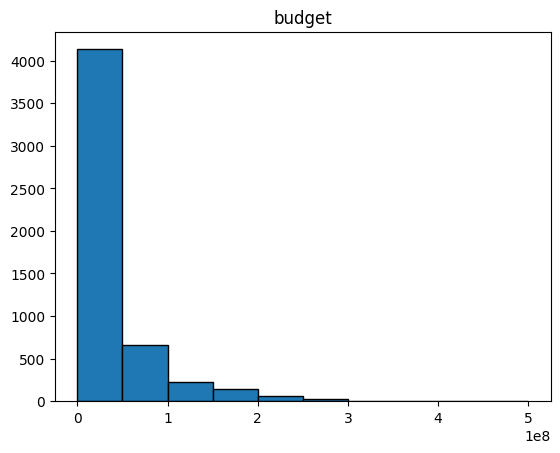

In [17]:
df.hist(column='budget', grid=False, edgecolor='black')

array([[<Axes: title={'center': 'revenue'}>]], dtype=object)

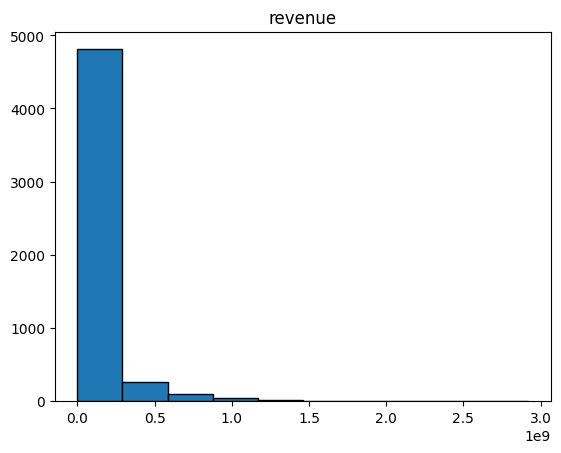

In [18]:
df.hist(column='revenue', grid=False, edgecolor='black')

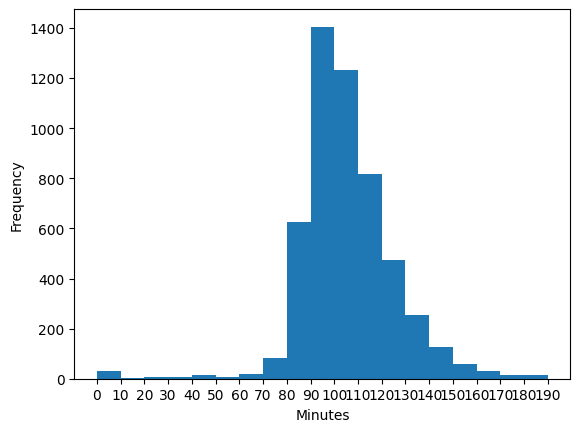

In [19]:
plt.hist(df['runtime'], bins=range(0, 200, 10))
plt.xticks(range(0, 200, 10))
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

array([[<Axes: title={'center': 'vote_average'}>]], dtype=object)

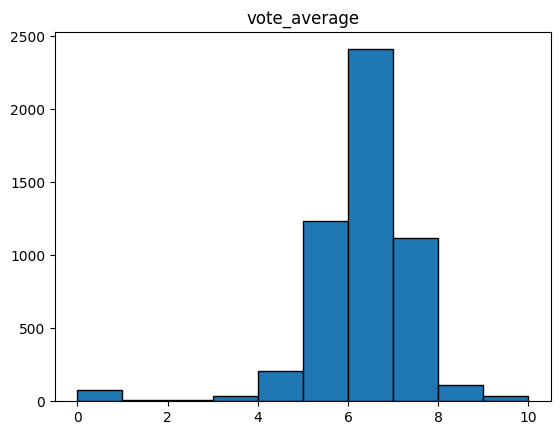

In [20]:
df.hist(column='vote_average', grid=False, edgecolor='black')

array([[<Axes: title={'center': 'vote_count'}>]], dtype=object)

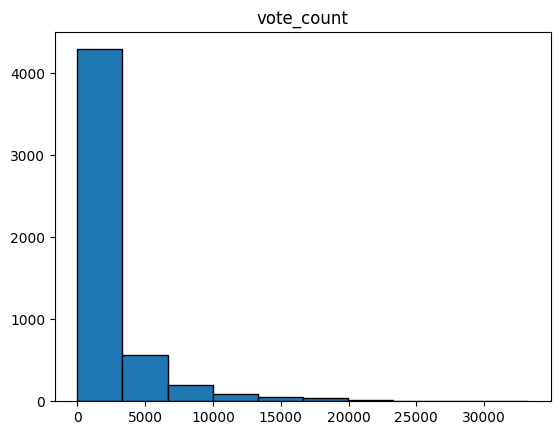

In [21]:
df.hist(column='vote_count', grid=False, edgecolor='black')

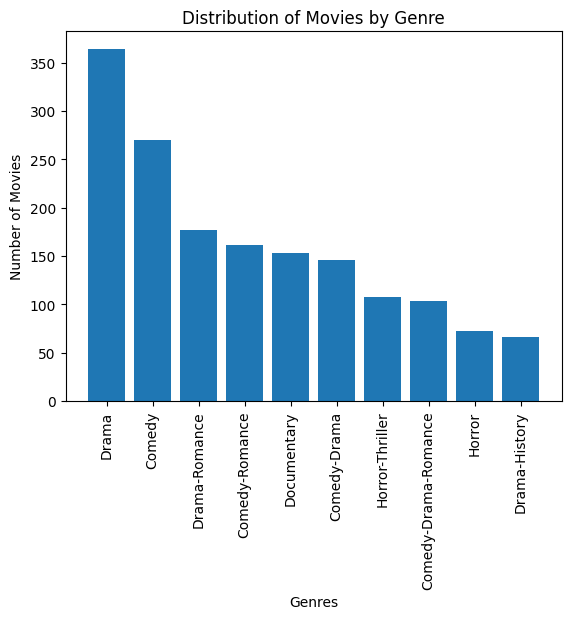

In [22]:
# plot count plot for the top 10 genre column
genres_count=df['genres'].value_counts()
top_10_genres=genres_count.head(10)
plt.bar(top_10_genres.index,top_10_genres.values)
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Genre')
plt.show()

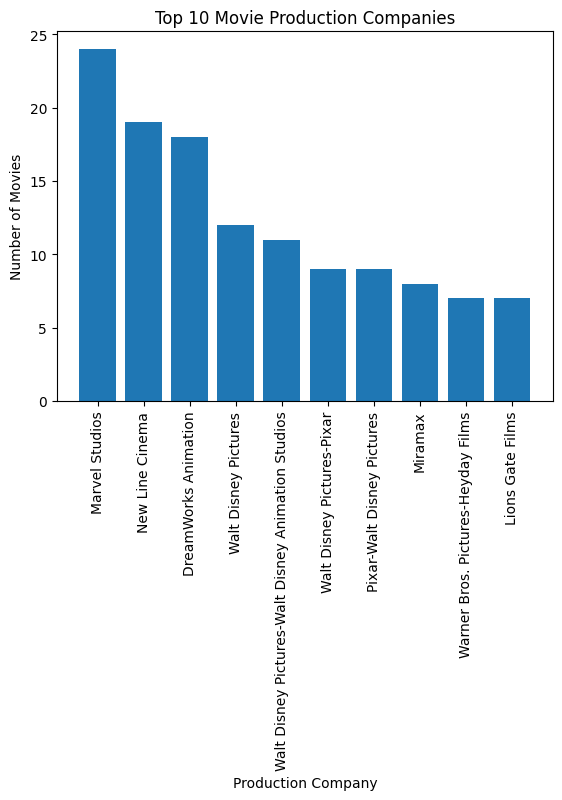

In [23]:
# Plot the top 10 movie companies 
company_counts = df['production_companies'].value_counts().sort_values(ascending=False)
top_10_companies = company_counts.head(10)
plt.bar(top_10_companies.index, top_10_companies.values)
plt.xticks(rotation=90)
plt.xlabel('Production Company')
plt.ylabel('Number of Movies')
plt.title('Top 10 Movie Production Companies')
plt.show()

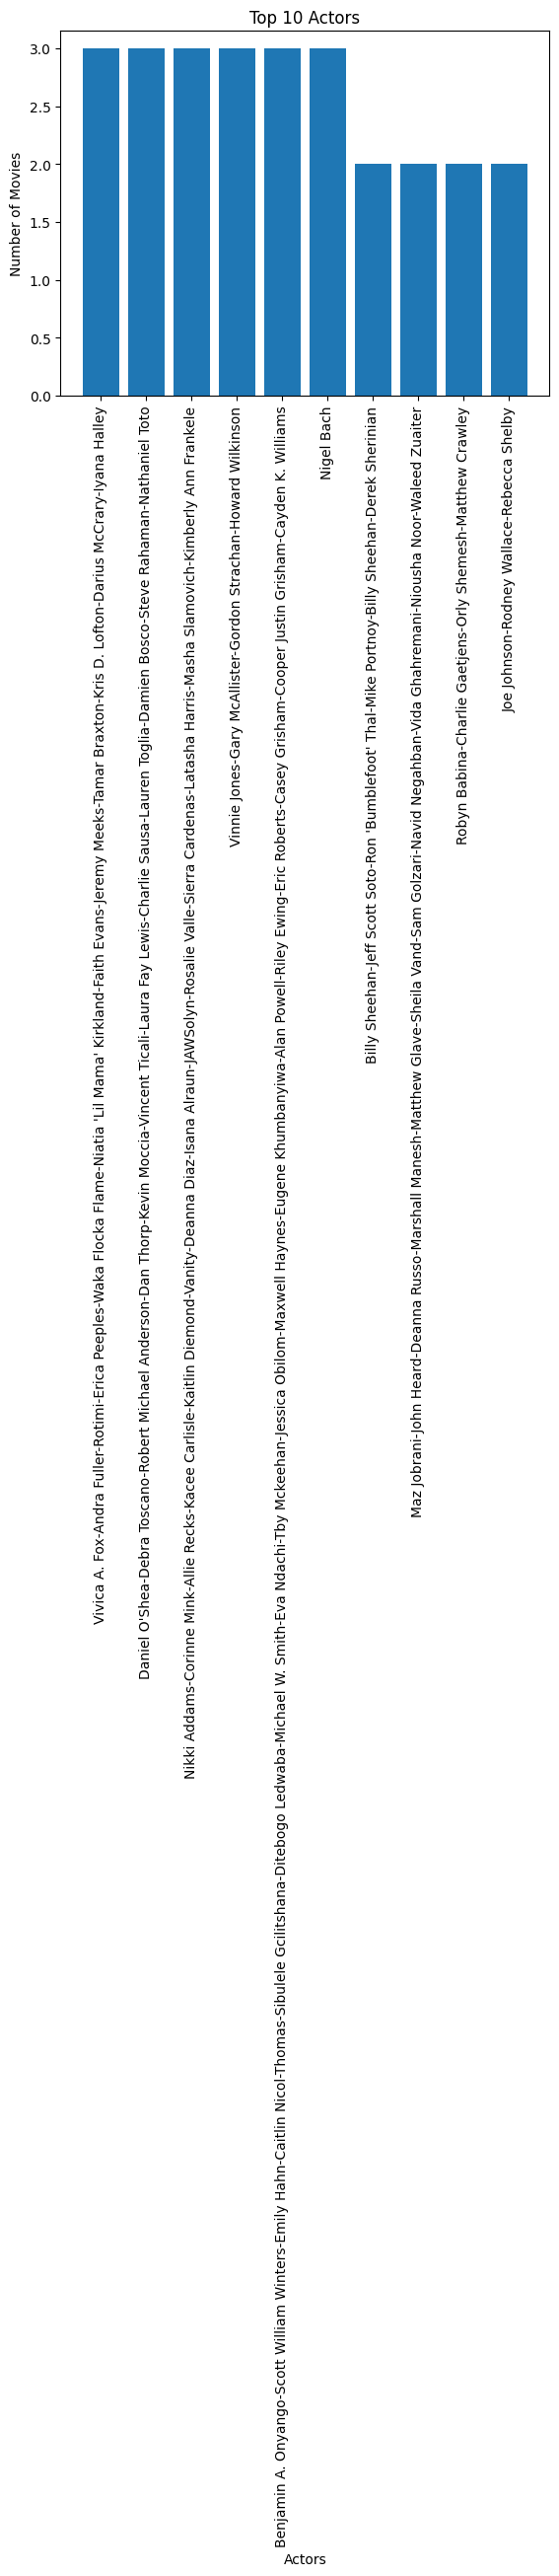

In [24]:
# Plot the top 10 actors  
actor_counts = df['credits'].value_counts().sort_values(ascending=False)
top_10_actors = actor_counts.head(10)
plt.bar(top_10_actors.index, top_10_actors.values)
plt.xticks(rotation=90)
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.title('Top 10 Actors')
plt.show()

### Bivariate Analysis

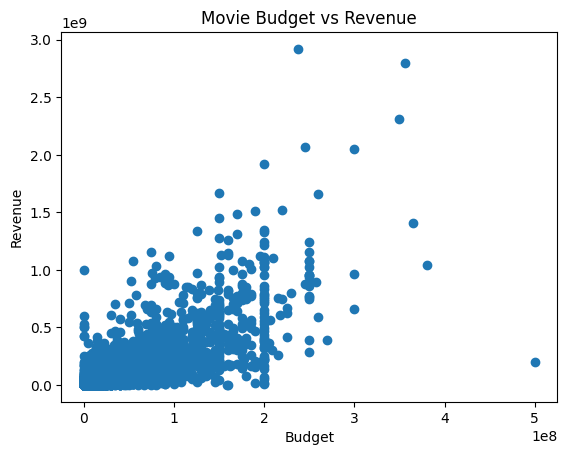

In [25]:
# Budget Vs Revenue
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Movie Budget vs Revenue')
plt.show()

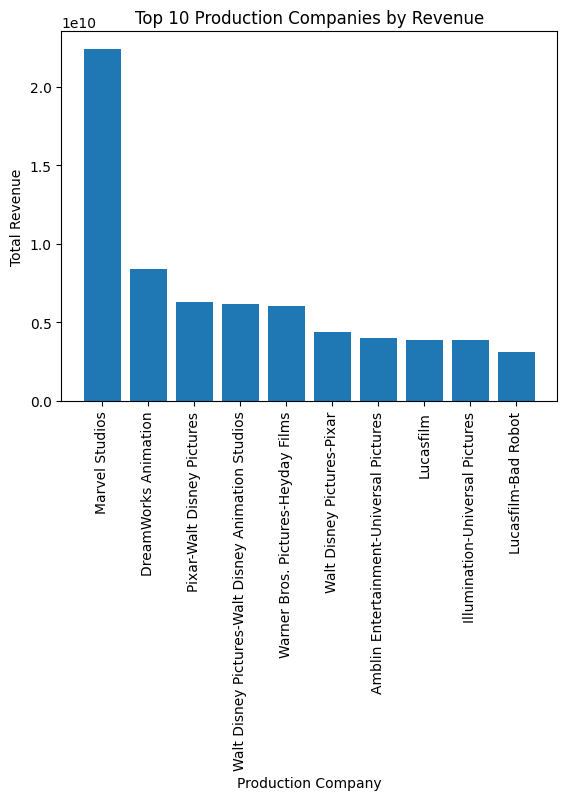

In [26]:
#Production company Vs revenue
company_revenue =df.groupby('production_companies')['revenue'].sum().sort_values(ascending=False)[:10]
plt.bar(company_revenue.index, company_revenue.values)
plt.xticks(rotation=90)
plt.xlabel('Production Company')
plt.ylabel('Total Revenue')
plt.title('Top 10 Production Companies by Revenue')
plt.show()

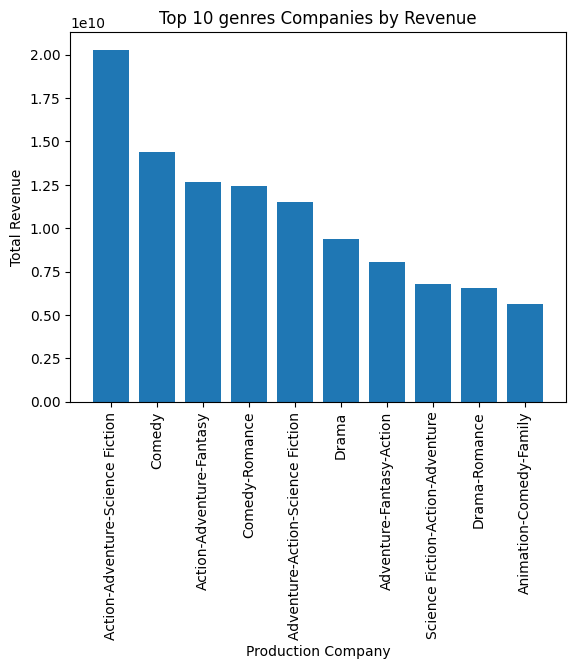

In [27]:
#Production genre Vs revenue
genre_revenue =df.groupby('genres')['revenue'].sum().sort_values(ascending=False)[:10]
plt.bar(genre_revenue.index, genre_revenue.values)
plt.xticks(rotation=90)
plt.xlabel('Production Company')
plt.ylabel('Total Revenue')
plt.title('Top 10 genres Companies by Revenue')
plt.show()

<Axes: title={'center': 'vote and revenue'}, xlabel='vote_average', ylabel='revenue'>

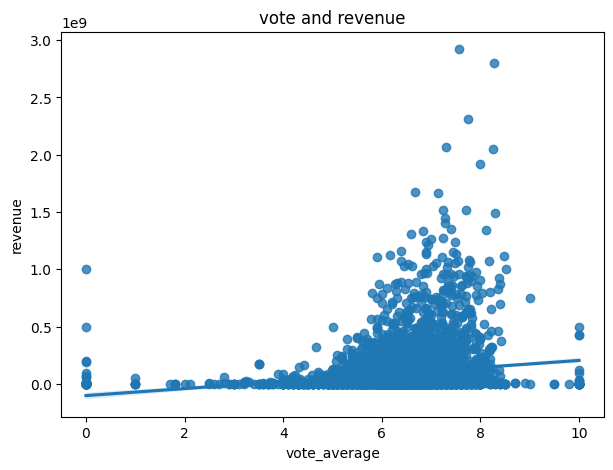

In [28]:
fig=plt.figure(figsize=(7,5))
plt.title("vote and revenue")
sns.regplot(x='vote_average',y='revenue',data=df)

### Multivariate Analysis

In [29]:

# compute the correlation matrix between budget and revenue
corr_matrix = df[['budget', 'revenue']].corr()

# print the correlation coefficient
print(corr_matrix.loc['budget', 'revenue'])

0.7546816468280768


In [30]:
# compute the correlation matrix between revenue and runtime
corr_matrix = df[['runtime', 'revenue']].corr()

# print the correlation coefficient
print(corr_matrix.loc['runtime', 'revenue'])

0.2594436873868459


In [31]:
# compute the correlation matrix between popularity and revenue
corr_matrix = df[['popularity', 'revenue']].corr()

# print the correlation coefficient
print(corr_matrix.loc['popularity', 'revenue'])

0.2878209751841866


In [32]:
corr=df.corr()
corr

,id,popularity,budget,revenue,runtime,vote_average,vote_count
id,1,0,-0,-0,-0,0,-0
popularity,0,1,0,0,0,0,0
budget,-0,0,1,1,0,0,1
revenue,-0,0,1,1,0,0,1
runtime,-0,0,0,0,1,0,0
vote_average,0,0,0,0,0,1,0
vote_count,-0,0,1,1,0,0,1


<Axes: >

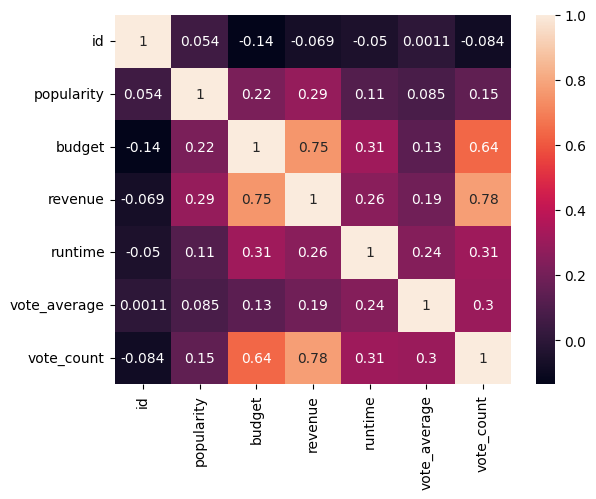

In [33]:
sns.heatmap(corr,annot=True)

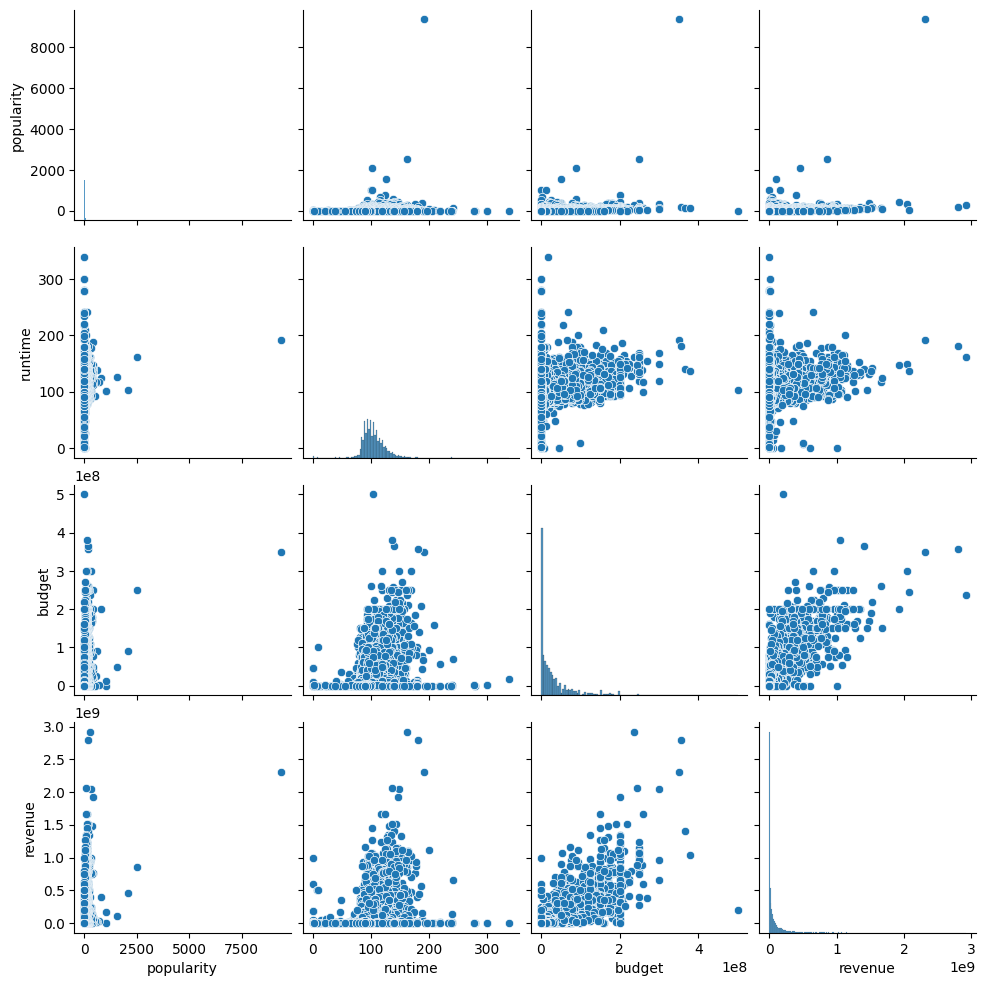

In [34]:
import seaborn as sns
import pandas as pd

# Specify the columns you want to include in the pair plot
columns_to_plot = ['popularity', 'runtime', 'budget', 'revenue']

# Subset the data to include only the columns of interest
data_subset = df[columns_to_plot]

# Drop any rows with missing values
#data_subset = data_subset.dropna()

# Create the pair plot
sns.pairplot(data_subset)

# DATA PREPROCESSING

####**DATA CLEANING**

### Handling Duplicate Values

##### Find and Drop duplicates

In [35]:
# DataFrame df will be modified in-place, with duplicate rows removed, and only the first occurrence of each duplicated combination of 'id' and 'title' will be retained.
df.drop_duplicates(subset=['id', 'title'], keep='first', inplace=True)

In [36]:
df.shape

(5180, 20)

In [36]:
df.isna().sum()

id                        0
title                     0
genres                   34
original_language         0
overview                  5
popularity                0
production_companies    202
release_date              0
budget                    0
revenue                   0
runtime                   1
status                    0
tagline                 654
vote_average              0
vote_count                0
credits                  20
keywords                331
poster_path              23
backdrop_path           179
recommendations         756
dtype: int64

### Handling Missing Values

##### Runtime

In [37]:
# the 'runtime' column in df will be updated with the mean runtime for each genre where the 'runtime' value was initially null. For rows with non-null 'runtime' values, the original value will be retained.
genre_means = df.groupby('genres')['runtime'].mean()
df['runtime'] = df.apply(lambda row: genre_means[row['genres']] if pd.isnull(row['runtime']) else row['runtime'], axis=1)

In [38]:
df.isna().sum()

id                        0
title                     0
genres                   34
original_language         0
overview                  5
popularity                0
production_companies    202
release_date              0
budget                    0
revenue                   0
runtime                   0
status                    0
tagline                 654
vote_average              0
vote_count                0
credits                  20
keywords                331
poster_path              23
backdrop_path           179
recommendations         756
dtype: int64

##### Genre

In [39]:
# calculates the mean runtime for each genre in the DataFrame df using the groupby() method and stores the results in a new DataFrame called genre_means.
# It then fills null values in the 'genres' column based on the mean runtime values.
genre_means = df.groupby('genres')['runtime'].mean().reset_index()
genre_means.columns = ['genres', 'mean_runtime']

# Fill null genre values based on mean runtime
for index, row in df.iterrows():
    if pd.isnull(row['genres']):
        runtime = row['runtime']
        matched_genre = genre_means[(runtime >= genre_means['mean_runtime'])]['genres'].values
        if len(matched_genre) > 0:
            df.at[index, 'genres'] = matched_genre[0]

In [40]:
df.isna().sum()

id                        0
title                     0
genres                    8
original_language         0
overview                  5
popularity                0
production_companies    202
release_date              0
budget                    0
revenue                   0
runtime                   0
status                    0
tagline                 654
vote_average              0
vote_count                0
credits                  20
keywords                331
poster_path              23
backdrop_path           179
recommendations         756
dtype: int64

In [41]:
# mode imputation on genres with 8 null values
df['genres'] = df['genres'].fillna(df['genres'].mode().iloc[0])

In [104]:
df.isna().sum()

id                        0
title                     0
genres                    0
original_language         0
overview                  5
popularity                0
production_companies    202
release_date              0
budget                    0
revenue                   0
runtime                   0
status                    0
tagline                 654
vote_average              0
vote_count                0
credits                  20
keywords                331
poster_path              23
backdrop_path           179
recommendations         756
dtype: int64

##### Production Companies

In [42]:
# calculates the mode (most frequent value) for the 'production_companies' column within each genre in the DataFrame df.
# It then fills null values in the 'production_companies' column based on the genre-specific mode.

mode_by_genre = df.groupby('genres')['production_companies'].apply(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else None)

# lambda function to fill null values in the 'production_companies' column based on the corresponding genre's mode.
# If the mode is not available (e.g., when all values are null), the null value remains

df['production_companies'] = df.apply(lambda row: mode_by_genre[row['genres']]
                                      if pd.isnull(row['production_companies']) else row['production_companies'],
                                      axis=1)

In [43]:
df.isna().sum()

id                        0
title                     0
genres                    0
original_language         0
overview                  5
popularity                0
production_companies     13
release_date              0
budget                    0
revenue                   0
runtime                   0
status                    0
tagline                 654
vote_average              0
vote_count                0
credits                  20
keywords                331
poster_path              23
backdrop_path           179
recommendations         756
dtype: int64

In [44]:
# mode imputation on production companies
df['production_companies'] = df['production_companies'].fillna(df['production_companies'].mode().iloc[0])

In [45]:
df.isna().sum()

id                        0
title                     0
genres                    0
original_language         0
overview                  5
popularity                0
production_companies      0
release_date              0
budget                    0
revenue                   0
runtime                   0
status                    0
tagline                 654
vote_average              0
vote_count                0
credits                  20
keywords                331
poster_path              23
backdrop_path           179
recommendations         756
dtype: int64

In [46]:
mask = df['genres'].isnull() & df['runtime'].isnull()
num_rows = len(df[mask])
print("Number of rows with both runtime and genres as null values",num_rows)

Number of rows with both runtime and genres as null values 0


#### Imputation on zero values

In [47]:
count = len(df[df['budget'] < 100000])
print(count)

1225


In [48]:
#  any 'budget' values in df that are less than 100,000 will be replaced with the median value of the 'budget' column.
for i in df.index:
    if df.loc[i,'budget']<100000:
        df.loc[i,'budget']=df['budget'].median()

In [49]:
count = len(df[df['runtime'] == 0])
print(count)

16


In [50]:
#  any 'runtime' values in df that are equal to 0 will be replaced in accordance with the mean runtime of genre
for i in df.index:
    if df.loc[i,'runtime']==0:
        df.loc[i,'runtime']=df['runtime'].median()

In [51]:
count = len(df[df['runtime'] == 0])
print(count)

0


**FEATURE ENGINEERING**

In [52]:
df = df.drop(['original_language', 'overview','status', 'tagline','credits','keywords','poster_path','backdrop_path','recommendations'], axis=1)

In [53]:
# Extract month, year, and day of the week
df['month'] = df['release_date'].dt.month
df['year'] = df['release_date'].dt.year
df['day_of_week'] = df['release_date'].dt.dayofweek

In [54]:
df.head(3)

,id,title,genres,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,month,year,day_of_week
0,76600,Avatar: The Way of Water,Science Fiction-Adventure-Action,9367,20th Century Studios-Lightstorm Entertainment,2022-12-14,350000000,2312335665,192,8,6748,12,2022,2
6,505642,Black Panther: Wakanda Forever,Action-Adventure-Science Fiction,2525,Marvel Studios,2022-11-09,250000000,858535561,162,7,3922,11,2022,2
8,315162,Puss in Boots: The Last Wish,Animation-Adventure-Comedy-Family,2078,DreamWorks Animation-Universal Pictures,2022-12-07,90000000,463087568,103,8,4671,12,2022,2


In [55]:
df.genres.nunique()

1267

In [56]:
#splitting the multiple genre values with the first genre value before'-' since it has more relevance
df['genres'] = df['genres'].str.split('-', expand=True)[0]


In [57]:
df.genres.nunique()

19

In [58]:
df.production_companies.nunique()

4589

In [59]:
#splitting the multiple production companies values with the first value before'-' since it has more relevance
df['production_companies'] = df['production_companies'].str.split('-', expand=True)[0]

In [60]:
df.production_companies.nunique()

1681

In [61]:
# find a new column named weighted_vote
min_votes = 1000
avg_vote = 6.5
df['weighted_vote'] = (df['vote_count']/(df['vote_count'] + min_votes)) * df['vote_average'] + (min_votes/(df['vote_count'] + min_votes)) * avg_vote

In [62]:
df['weighted_vote'].describe()

count   5180
mean       7
std        0
min        4
25%        6
50%        6
75%        7
max        8
Name: weighted_vote, dtype: float64

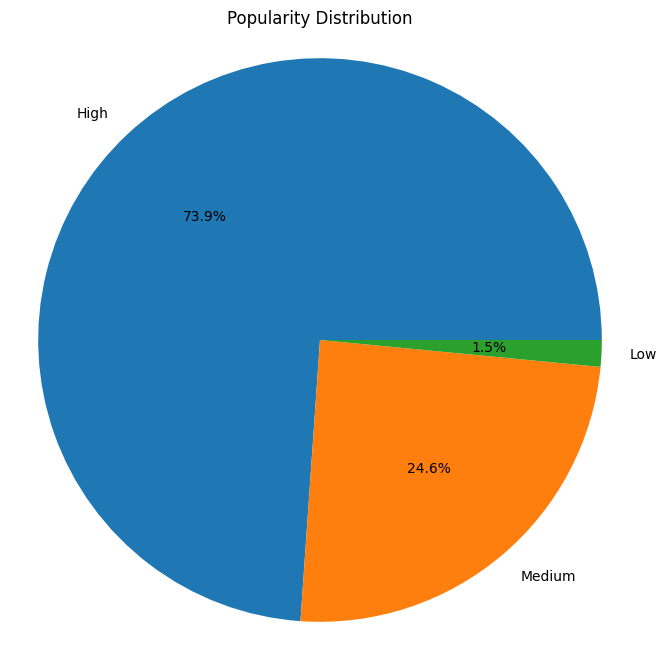

In [63]:
# Define the popularity categories
categories = ['Low', 'Medium', 'High']

# Group the popularity values into categories
df['popularity_category'] = pd.cut(df['popularity'], bins=[0, 1, 10, df['popularity'].max()], labels=categories, right=False)

# Count the frequency of each popularity category
category_counts = df['popularity_category'].value_counts()

# Get the labels and frequencies
labels = category_counts.index
frequencies = category_counts.values

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(frequencies, labels=labels, autopct='%1.1f%%')
plt.title('Popularity Distribution')
plt.axis('equal')
plt.show()

In [64]:
df.isna().sum()

id                      0
title                   0
genres                  0
popularity              0
production_companies    0
release_date            0
budget                  0
revenue                 0
runtime                 0
vote_average            0
vote_count              0
month                   0
year                    0
day_of_week             0
weighted_vote           0
popularity_category     1
dtype: int64

In [65]:
null_rows = df[df['popularity_category'].isnull()]
print(null_rows)

      id                     title           genres  popularity  \
0  76600  Avatar: The Way of Water  Science Fiction        9367   

   production_companies release_date    budget    revenue  runtime  \
0  20th Century Studios   2022-12-14 350000000 2312335665      192   

   vote_average  vote_count  month  year  day_of_week  weighted_vote  \
0             8        6748     12  2022            2              8   

  popularity_category  
0                 NaN  


In [66]:
# fill the null value with 'high'
df['popularity_category'] = df['popularity_category'].fillna('High')

In [67]:
df['popularity_category'].isna().sum()

0

In [68]:
df.shape

(5180, 16)

**OUTLIER DETECTION**

In [69]:
df_outliers=df.copy()

In [70]:
# Select the columns for outlier detection
numerical_cols = ['budget', 'revenue', 'runtime', 'vote_count','vote_average']

# Calculate the IQR for each column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the rows containing outliers
outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)

# Remove the rows with outliers
df_no_outliers = df[~outliers]

# Print the number of removed outliers
print(f"Number of outliers removed: {outliers.sum()}")

# Display the dataframe without outliers
print(df_no_outliers.head())

Number of outliers removed: 1199
        id                             title           genres  popularity  \
12  937278                 A Man Called Otto           Comedy        1545   
17  758009                   Shotgun Wedding           Action        1043   
18  536554                             M3GAN  Science Fiction        1026   
28  785084                         The Whale            Drama         687   
37  668482  Roald Dahl's Matilda the Musical           Family         549   

   production_companies release_date   budget   revenue  runtime  \
12             Playtone   2022-12-28 50000000 103842303      126   
17            Lionsgate   2022-12-28 15000000   4495365      101   
18       Atomic Monster   2022-12-28 12000000 167643991      102   
28                  A24   2022-12-09  3000000  36752010      117   
37  Working Title Films   2022-11-25 25000000  13276499      117   

    vote_average  vote_count  month  year  day_of_week  weighted_vote  \
12             8      

In [71]:
df_no_outliers.shape

(3981, 16)

In [72]:
df_no_outliers.describe()

,id,popularity,budget,revenue,runtime,vote_average,vote_count,month,year,day_of_week,weighted_vote
count,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981,3981
mean,180669,20,20790751,34491021,103,6,1032,7,2011,3,6
std,216169,44,16242849,46960545,14,1,1147,3,6,1,0
min,16,1,100000,100345,60,4,1,1,2000,0,5
25%,12763,9,11000000,1754389,93,6,207,4,2006,3,6
50%,57089,14,15000000,13100000,101,6,587,7,2011,4,6
75%,332567,21,26000000,49678401,111,7,1463,9,2016,4,7
max,965150,1545,79000000,227300000,148,8,5629,12,2022,6,8


It can be noted that by using IQR method for outlier detection and removal, most of the relevant data got removed.So proceeding with original data that has outliers

**LABEL ENCODING**

In [73]:
# label encoding of categorical columns on data with outliers
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df_outliers['genres']=le.fit_transform(df_outliers['genres'])
df_outliers['popularity_category']=le.fit_transform(df_outliers['popularity_category'])
df_outliers['production_companies']=le.fit_transform(df_outliers['production_companies'])

In [74]:
df_outliers.head(10)

,id,title,genres,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,month,year,day_of_week,weighted_vote,popularity_category
0,76600,Avatar: The Way of Water,14,9367,7,2022-12-14,350000000,2312335665,192,8,6748,12,2022,2,8,0
6,505642,Black Panther: Wakanda Forever,0,2525,913,2022-11-09,250000000,858535561,162,7,3922,11,2022,2,7,0
8,315162,Puss in Boots: The Last Wish,2,2078,442,2022-12-07,90000000,463087568,103,8,4671,12,2022,2,8,0
12,937278,A Man Called Otto,3,1545,1141,2022-12-28,50000000,103842303,126,8,540,12,2022,2,7,0
17,758009,Shotgun Wedding,0,1043,840,2022-12-28,15000000,4495365,101,6,618,12,2022,2,6,0
18,536554,M3GAN,14,1026,124,2022-12-28,12000000,167643991,102,7,2113,12,2022,2,7,0
24,436270,Black Adam,0,784,1015,2022-10-19,200000000,392952111,125,7,4391,10,2022,2,7,0
28,785084,The Whale,6,687,34,2022-12-09,3000000,36752010,117,8,1559,12,2022,4,7,0
31,653851,Devotion,17,595,204,2022-11-23,90000000,20000000,139,7,346,11,2022,2,7,0
37,668482,Roald Dahl's Matilda the Musical,7,549,1638,2022-11-25,25000000,13276499,117,7,496,11,2022,4,7,0


**SCALING**

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

In [76]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the original DataFrame
scaled_df_outliers = df_outliers.copy()

# Select the continuous numerical columns for scaling, here avoid revenue column since it is the target column
columns_to_scale = ['popularity','budget','runtime']  # Replace with the actual column names

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the selected columns in the scaled DataFrame
scaled_df_outliers[columns_to_scale] = scaler.fit_transform(df_outliers[columns_to_scale])

# Display the scaled DataFrame
scaled_df_outliers

,id,title,genres,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,month,year,day_of_week,weighted_vote,popularity_category
0,76600,Avatar: The Way of Water,14,1,7,2022-12-14,1,2312335665,1,8,6748,12,2022,2,8,0
6,505642,Black Panther: Wakanda Forever,0,0,913,2022-11-09,0,858535561,0,7,3922,11,2022,2,7,0
8,315162,Puss in Boots: The Last Wish,2,0,442,2022-12-07,0,463087568,0,8,4671,12,2022,2,8,0
12,937278,A Man Called Otto,3,0,1141,2022-12-28,0,103842303,0,8,540,12,2022,2,7,0
17,758009,Shotgun Wedding,0,0,840,2022-12-28,0,4495365,0,6,618,12,2022,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665026,634494,Neighbor,10,0,1537,2019-05-07,0,221774,0,0,0,5,2019,1,6,1
680196,615061,The Trouble with Money,7,0,191,2006-06-01,0,195385,0,0,0,6,2006,3,6,1
685071,502981,Gonjeshkake ashi mashi,6,0,507,2018-01-09,0,1500000,0,0,0,1,2018,1,6,1
695275,493180,Super Bheem Toota Khush Tara,0,0,1533,2017-12-17,0,1253654,0,8,2,12,2017,6,7,1


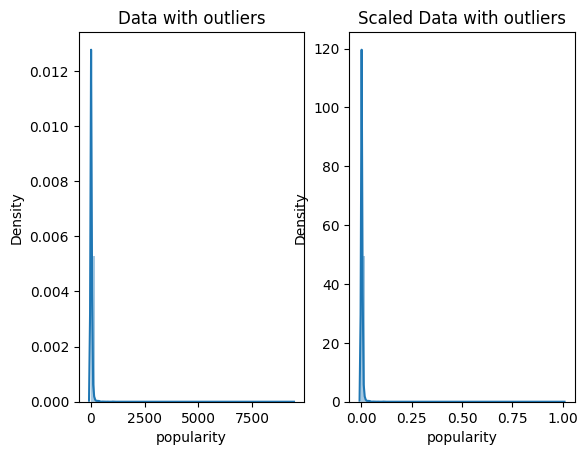

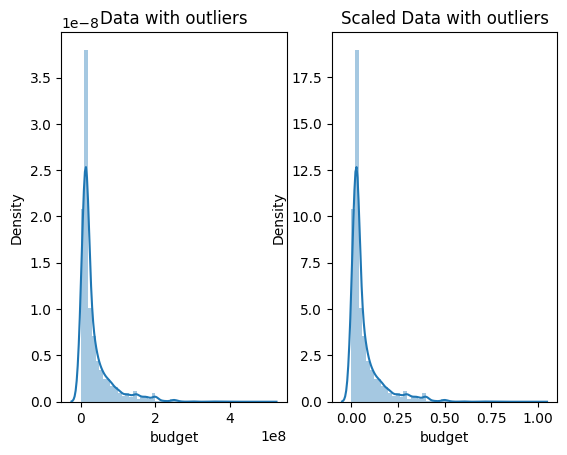

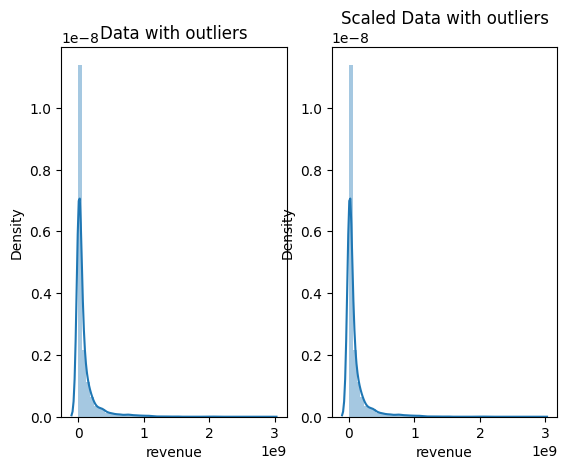

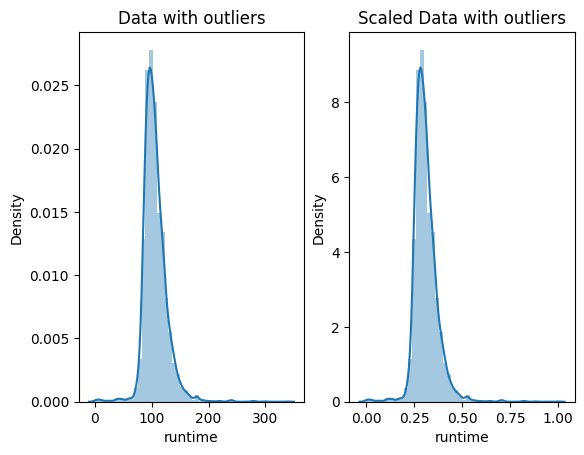

In [77]:
for i in df_outliers[['popularity', 'budget', 'revenue','runtime']]:
    fig,ax=plt.subplots(1,2)
    sns.distplot(df_outliers[i],ax=ax[0])
    ax[0].set_title("Data with outliers")
    sns.distplot(scaled_df_outliers[i],ax=ax[1])
    ax[1].set_title("Scaled Data with outliers")

**NORMALIZATION**

In [78]:
# boxcox transformation
from scipy.stats import boxcox
df_boxcox=df_outliers.copy()
# Define the columns to be transformed
numerical_columns = ['popularity', 'budget', 'runtime']

# Apply Box-Cox transformation to the numerical columns
for column in numerical_columns:
    # Add a constant to handle zero or negative values
    transformed_data, lambda_val = boxcox(df_boxcox[column] + 1)
    df_boxcox[column] = transformed_data

# Print the transformed DataFrame
df_boxcox

,id,title,genres,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,month,year,day_of_week,weighted_vote,popularity_category
0,76600,Avatar: The Way of Water,14,6,7,2022-12-14,165,2312335665,61,8,6748,12,2022,2,8,0
6,505642,Black Panther: Wakanda Forever,0,6,913,2022-11-09,156,858535561,54,7,3922,11,2022,2,7,0
8,315162,Puss in Boots: The Last Wish,2,6,442,2022-12-07,130,463087568,39,8,4671,12,2022,2,8,0
12,937278,A Man Called Otto,3,5,1141,2022-12-28,117,103842303,45,8,540,12,2022,2,7,0
17,758009,Shotgun Wedding,0,5,840,2022-12-28,94,4495365,38,6,618,12,2022,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665026,634494,Neighbor,10,0,1537,2019-05-07,94,221774,33,0,0,5,2019,1,6,1
680196,615061,The Trouble with Money,7,0,191,2006-06-01,94,195385,18,0,0,6,2006,3,6,1
685071,502981,Gonjeshkake ashi mashi,6,0,507,2018-01-09,36,1500000,35,0,0,1,2018,1,6,1
695275,493180,Super Bheem Toota Khush Tara,0,0,1533,2017-12-17,44,1253654,53,8,2,12,2017,6,7,1


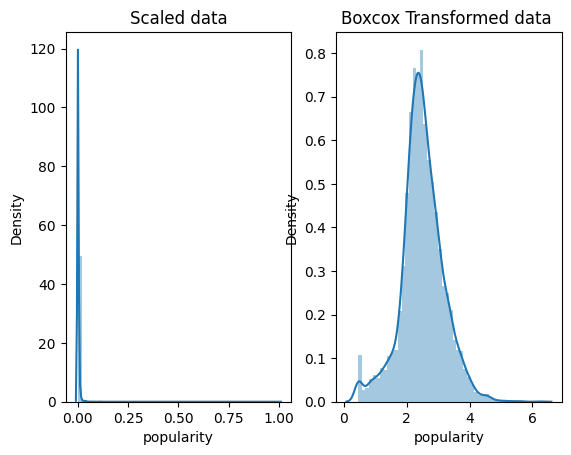

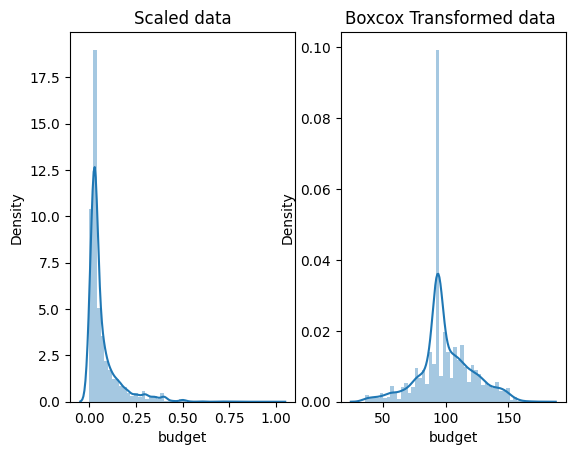

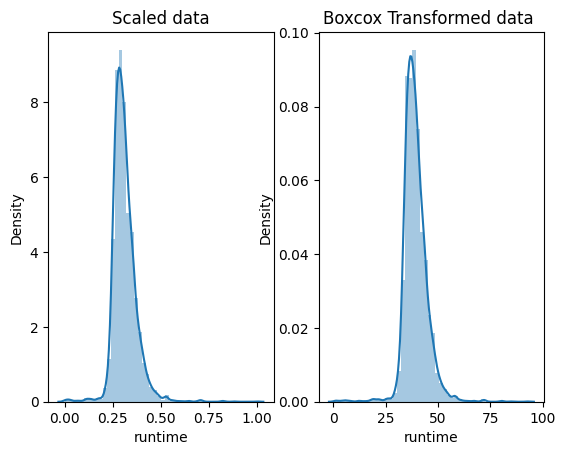

In [79]:
for i in df_outliers[['popularity', 'budget','runtime']]:
    fig,ax=plt.subplots(1,2)
    sns.distplot(scaled_df_outliers[i],ax=ax[0])
    ax[0].set_title("Scaled data")
    sns.distplot(df_boxcox[i],ax=ax[1])
    ax[1].set_title("Boxcox Transformed data ")

####Scaled data with outliers using Box-Cox¶

In [80]:
from scipy.stats import boxcox
df_boxcox_scaled=scaled_df_outliers.copy()
# Define the columns to be transformed
numerical_columns = ['popularity', 'budget', 'runtime']

# Apply Box-Cox transformation to the numerical columns
for column in numerical_columns:
    # Add a constant to handle zero or negative values
    transformed_data, lambda_val = boxcox(df_boxcox_scaled[column] + 1)
    df_boxcox_scaled[column] = transformed_data

# Print the transformed DataFrame
df_boxcox_scaled

,id,title,genres,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,month,year,day_of_week,weighted_vote,popularity_category
0,76600,Avatar: The Way of Water,14,0,7,2022-12-14,0,2312335665,0,8,6748,12,2022,2,8,0
6,505642,Black Panther: Wakanda Forever,0,0,913,2022-11-09,0,858535561,0,7,3922,11,2022,2,7,0
8,315162,Puss in Boots: The Last Wish,2,0,442,2022-12-07,0,463087568,0,8,4671,12,2022,2,8,0
12,937278,A Man Called Otto,3,0,1141,2022-12-28,0,103842303,0,8,540,12,2022,2,7,0
17,758009,Shotgun Wedding,0,0,840,2022-12-28,0,4495365,0,6,618,12,2022,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665026,634494,Neighbor,10,0,1537,2019-05-07,0,221774,0,0,0,5,2019,1,6,1
680196,615061,The Trouble with Money,7,0,191,2006-06-01,0,195385,0,0,0,6,2006,3,6,1
685071,502981,Gonjeshkake ashi mashi,6,0,507,2018-01-09,0,1500000,0,0,0,1,2018,1,6,1
695275,493180,Super Bheem Toota Khush Tara,0,0,1533,2017-12-17,0,1253654,0,8,2,12,2017,6,7,1


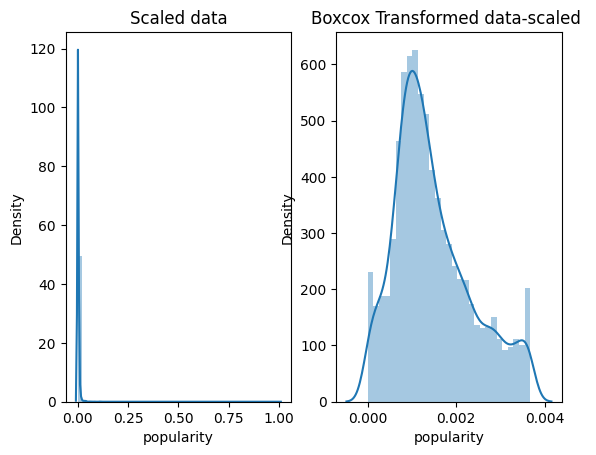

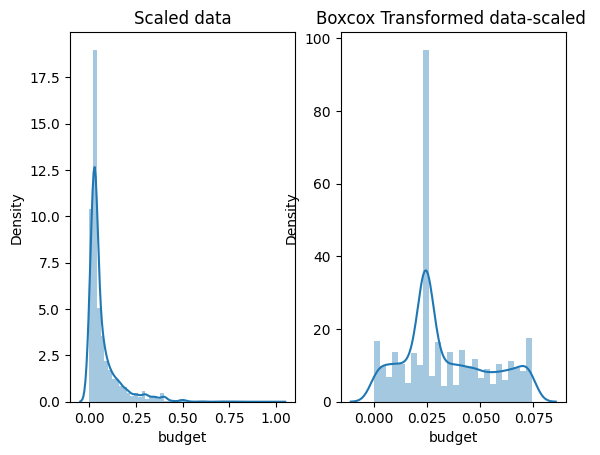

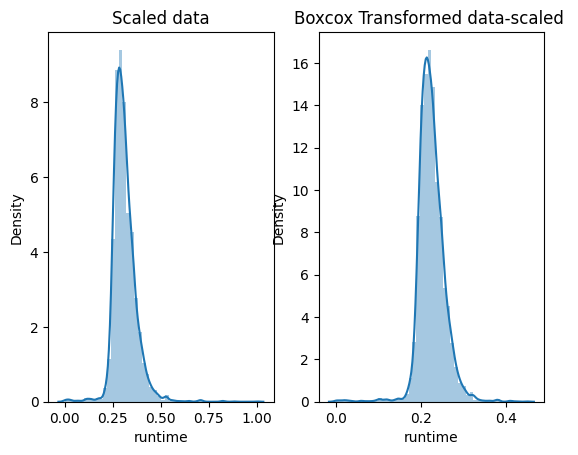

In [81]:
for i in df_outliers[['popularity', 'budget','runtime']]:
    fig,ax=plt.subplots(1,2)
    sns.distplot(scaled_df_outliers[i],ax=ax[0])
    ax[0].set_title("Scaled data")
    sns.distplot(df_boxcox_scaled[i],ax=ax[1])
    ax[1].set_title("Boxcox Transformed data-scaled ")

## MODEL **BUILDING**

### Model Selection

In [82]:
data1=pd.read_csv('/content/drive/MyDrive/project-dataset/CLEAN.csv',encoding ='ISO-8859-1')

In [83]:
data1.shape

(5169, 17)

In [84]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5169 non-null   int64  
 1   id                    5169 non-null   int64  
 2   title                 5169 non-null   object 
 3   genres                5169 non-null   object 
 4   popularity            5169 non-null   float64
 5   production_companies  5169 non-null   object 
 6   release_date          5169 non-null   object 
 7   budget                5169 non-null   float64
 8   revenue               5169 non-null   float64
 9   runtime               5169 non-null   float64
 10  vote_average          5169 non-null   float64
 11  vote_count            5169 non-null   float64
 12  month                 5169 non-null   int64  
 13  year                  5169 non-null   int64  
 14  day_of_week           5169 non-null   int64  
 15  weighted_vote        

In [85]:
data1['release_date'] = pd.to_datetime(data1['release_date'])

In [86]:
df1=data1.copy()


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [87]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.neural_network import MLPRegressor

In [88]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from lightgbm import LGBMRegressor

In [90]:
# label encoding of categorical columns on data with outliers
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df1['genres']=le.fit_transform(df1['genres'])
df1['production_companies']=le.fit_transform(df1['production_companies'])

In [91]:
df1.head(5)

,Unnamed: 0,id,title,genres,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,month,year,day_of_week,weighted_vote,popularity_category
0,0,76600,Avatar: The Way of Water,14,9367,7,2022-12-14,350000000,2312335665,192,8,6748,12,2022,2,8,High
1,1,505642,Black Panther: Wakanda Forever,0,2525,913,2022-11-09,250000000,858535561,162,7,3922,11,2022,2,7,High
2,2,315162,Puss in Boots: The Last Wish,2,2078,442,2022-12-07,90000000,463087568,103,8,4671,12,2022,2,8,High
3,3,937278,A Man Called Otto,3,1545,1141,2022-12-28,50000000,103842303,126,8,540,12,2022,2,7,High
4,4,758009,Shotgun Wedding,0,1043,840,2022-12-28,15000000,4495365,101,6,618,12,2022,2,6,High


##### Models for data without scaling

In [92]:
df_outliers_m=df1.copy()
df_outliers_m = df_outliers_m.drop(['id', 'title','popularity', 'release_date','vote_average','vote_count','weighted_vote','popularity_category'], axis=1)

In [93]:
df_outliers_m

,Unnamed: 0,genres,production_companies,budget,revenue,runtime,month,year,day_of_week
0,0,14,7,350000000,2312335665,192,12,2022,2
1,1,0,913,250000000,858535561,162,11,2022,2
2,2,2,442,90000000,463087568,103,12,2022,2
3,3,3,1141,50000000,103842303,126,12,2022,2
4,4,0,840,15000000,4495365,101,12,2022,2
...,...,...,...,...,...,...,...,...,...
5164,5175,0,1577,100000,200000,2,10,2021,6
5165,5176,5,479,15000000,1000000,90,8,2020,4
5166,5177,10,742,15000000,1094584,85,7,2008,1
5167,5178,14,581,1000000,126000,100,3,2019,4


In [94]:
x1=df_outliers_m.drop('revenue',axis=1)
y1=df_outliers_m['revenue']

In [97]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1.values,y1,test_size=0.2,random_state=42)

In [98]:
models={
    'Linear Regression':LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'XG Boost Regression':XGBRegressor(),
    'XG Boost RF Regressor':XGBRFRegressor(),
    'Neural Network':MLPRegressor(),
    'CatBoost Regressor':CatBoostRegressor(verbose=0),
    'Random Forest':RandomForestRegressor(),
    'Light Gradient Boost':LGBMRegressor()
}

In [99]:
for name,model in models.items():
    model.fit(x1_train,y1_train)
    print(name + ' trained')

Linear Regression trained
Ridge Regression trained
Lasso Regression trained
XG Boost Regression trained
XG Boost RF Regressor trained
Neural Network trained
CatBoost Regressor trained
Random Forest trained
Light Gradient Boost trained


In [100]:
def get_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

In [101]:
for name,model in models.items():
    y1_pred = model.predict(x1_test)
    mse = get_mse(y1_test,y1_pred)
    print(name + ' MSE: {:.2f}'.format(mse))

Linear Regression MSE: 15865378070666302.00
Ridge Regression MSE: 15865378502024494.00
Lasso Regression MSE: 15865378071412364.00
XG Boost Regression MSE: 15133270904007552.00
XG Boost RF Regressor MSE: 12811661743623430.00
Neural Network MSE: 16875240778059530.00
CatBoost Regressor MSE: 10152631065756808.00
Random Forest MSE: 11745076373690692.00
Light Gradient Boost MSE: 11804092593726976.00


In [102]:
def get_rmse(y_true,y_pred):
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))
    return rmse

In [103]:
for name,model in models.items():
    y1_pred = model.predict(x1_test)
    rmse = get_rmse(y1_test,y1_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

Linear Regression RMSE: 125957842.43
Ridge Regression RMSE: 125957844.15
Lasso Regression RMSE: 125957842.44
XG Boost Regression RMSE: 123017360.17
XG Boost RF Regressor RMSE: 113188611.37
Neural Network RMSE: 129904737.32
CatBoost Regressor RMSE: 100760265.31
Random Forest RMSE: 108374703.57
Light Gradient Boost RMSE: 108646640.97


In [104]:
from sklearn.metrics import r2_score

def get_r2(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    return r2

In [105]:
for name,model in models.items():
    y1_pred = model.predict(x1_test)
    r2 = get_r2(y1_test,y1_pred)
    print(name + ' R2: {:.2f}'.format(r2))

Linear Regression R2: 0.61
Ridge Regression R2: 0.61
Lasso Regression R2: 0.61
XG Boost Regression R2: 0.63
XG Boost RF Regressor R2: 0.68
Neural Network R2: 0.58
CatBoost Regressor R2: 0.75
Random Forest R2: 0.71
Light Gradient Boost R2: 0.71


##### For scaled data

In [106]:
scaled_df_outliers_m=df1.copy()
# Select the continuous numerical columns for scaling, here avoid revenue column since it is the target column
columns_to_scale = ['popularity','budget','runtime']  # Replace with the actual column names

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the selected columns in the scaled DataFrame
scaled_df_outliers_m[columns_to_scale] = scaler.fit_transform(df1[columns_to_scale])

# Display the scaled DataFrame
scaled_df_outliers_m
scaled_df_outliers_m = scaled_df_outliers_m.drop(['id', 'title','popularity', 'release_date','vote_average','vote_count','weighted_vote','popularity_category'], axis=1)

In [107]:
x2=scaled_df_outliers_m.drop('revenue',axis=1)
y2=scaled_df_outliers_m['revenue']

In [108]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2.values,y2,test_size=0.2,random_state=42)

In [109]:
for name,model in models.items():
    model.fit(x2_train,y2_train)
    print(name + ' trained')

Linear Regression trained
Ridge Regression trained
Lasso Regression trained
XG Boost Regression trained
XG Boost RF Regressor trained
Neural Network trained
CatBoost Regressor trained
Random Forest trained
Light Gradient Boost trained


In [110]:
for name,model in models.items():
    y2_pred = model.predict(x2_test)
    mse = get_mse(y2_test,y2_pred)
    print(name + ' MSE: {:.2f}'.format(mse))

Linear Regression MSE: 15865378070727884.00
Ridge Regression MSE: 15946266324352110.00
Lasso Regression MSE: 15865378221930560.00
XG Boost Regression MSE: 12933091497282650.00
XG Boost RF Regressor MSE: 12815566660999884.00
Neural Network MSE: 48661635148938352.00
CatBoost Regressor MSE: 10062057026871300.00
Random Forest MSE: 12166094108895072.00
Light Gradient Boost MSE: 11804092593726976.00


In [111]:
for name,model in models.items():
    y2_pred = model.predict(x2_test)
    rmse = get_rmse(y2_test,y2_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

Linear Regression RMSE: 125957842.43
Ridge Regression RMSE: 126278526.77
Lasso Regression RMSE: 125957843.03
XG Boost Regression RMSE: 113723750.81
XG Boost RF Regressor RMSE: 113205859.66
Neural Network RMSE: 220593823.91
CatBoost Regressor RMSE: 100309805.24
Random Forest RMSE: 110300018.63
Light Gradient Boost RMSE: 108646640.97


In [112]:
for name,model in models.items():
    y2_pred = model.predict(x2_test)
    r2 = get_r2(y2_test,y2_pred)
    print(name + ' R2: {:.2f}'.format(r2))

Linear Regression R2: 0.61
Ridge Regression R2: 0.61
Lasso Regression R2: 0.61
XG Boost Regression R2: 0.68
XG Boost RF Regressor R2: 0.68
Neural Network R2: -0.20
CatBoost Regressor R2: 0.75
Random Forest R2: 0.70
Light Gradient Boost R2: 0.71


##### For boxcox transformed data

In [113]:
df_boxcox = df_boxcox.drop(['id', 'title','popularity', 'release_date','vote_average','vote_count','weighted_vote','popularity_category'], axis=1)

In [114]:
x3=df_boxcox.drop('revenue',axis=1)
y3=df_boxcox['revenue']

In [115]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3.values,y3,test_size=0.2,random_state=42)

In [116]:
for name,model in models.items():
    model.fit(x3_train,y3_train)
    print(name + ' trained')

Linear Regression trained
Ridge Regression trained
Lasso Regression trained
XG Boost Regression trained
XG Boost RF Regressor trained
Neural Network trained
CatBoost Regressor trained
Random Forest trained
Light Gradient Boost trained


In [117]:
for name,model in models.items():
    y3_pred = model.predict(x3_test)
    mse = get_mse(y3_test,y3_pred)
    print(name + ' MSE: {:.2f}'.format(mse))

Linear Regression MSE: 26309238809936528.00
Ridge Regression MSE: 26309243904124692.00
Lasso Regression MSE: 26309238812859396.00
XG Boost Regression MSE: 15812071243056436.00
XG Boost RF Regressor MSE: 15601965374836358.00
Neural Network MSE: 52522995221602432.00
CatBoost Regressor MSE: 13980151321546020.00
Random Forest MSE: 15251961872943202.00
Light Gradient Boost MSE: 15667232888087252.00


In [118]:
for name,model in models.items():
    y3_pred = model.predict(x3_test)
    rmse = get_rmse(y3_test,y3_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

Linear Regression RMSE: 162201229.37
Ridge Regression RMSE: 162201245.08
Lasso Regression RMSE: 162201229.38
XG Boost Regression RMSE: 125746058.56
XG Boost RF Regressor RMSE: 124907827.52
Neural Network RMSE: 229178958.94
CatBoost Regressor RMSE: 118237689.94
Random Forest RMSE: 123498833.49
Light Gradient Boost RMSE: 125168817.55


In [119]:
for name,model in models.items():
    y3_pred = model.predict(x3_test)
    r2 = get_r2(y3_test,y3_pred)
    print(name + ' R2: {:.2f}'.format(r2))

Linear Regression R2: 0.40
Ridge Regression R2: 0.40
Lasso Regression R2: 0.40
XG Boost Regression R2: 0.64
XG Boost RF Regressor R2: 0.65
Neural Network R2: -0.19
CatBoost Regressor R2: 0.68
Random Forest R2: 0.65
Light Gradient Boost R2: 0.64


##### scaled-boxcox transformed data

In [120]:
df_boxcox_scaled = df_boxcox_scaled.drop(['id', 'title','popularity', 'release_date','vote_average','vote_count','weighted_vote','popularity_category'], axis=1)

In [121]:
x4=df_boxcox_scaled.drop('revenue',axis=1)
y4=df_boxcox_scaled['revenue']

In [122]:
x4_train,x4_test,y4_train,y4_test=train_test_split(x4.values,y4,test_size=0.2,random_state=42)

In [123]:
for name,model in models.items():
    model.fit(x4_train,y4_train)
    print(name + ' trained')

Linear Regression trained
Ridge Regression trained
Lasso Regression trained
XG Boost Regression trained
XG Boost RF Regressor trained
Neural Network trained
CatBoost Regressor trained
Random Forest trained
Light Gradient Boost trained


In [124]:
for name,model in models.items():
    y4_pred = model.predict(x4_test)
    mse = get_mse(y4_test,y4_pred)
    print(name + ' MSE: {:.2f}'.format(mse))

Linear Regression MSE: 26904085936460652.00
Ridge Regression MSE: 29288534994712636.00
Lasso Regression MSE: 26904087419569596.00
XG Boost Regression MSE: 15799762317510368.00
XG Boost RF Regressor MSE: 15593652610116334.00
Neural Network MSE: 52612799990637648.00
CatBoost Regressor MSE: 13980151321546020.00
Random Forest MSE: 15356124996201298.00
Light Gradient Boost MSE: 15667232888087252.00


In [125]:
for name,model in models.items():
    y4_pred = model.predict(x4_test)
    rmse = get_rmse(y4_test,y4_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

Linear Regression RMSE: 164024650.39
Ridge Regression RMSE: 171138934.77
Lasso Regression RMSE: 164024654.91
XG Boost Regression RMSE: 125697105.45
XG Boost RF Regressor RMSE: 124874547.49
Neural Network RMSE: 229374802.43
CatBoost Regressor RMSE: 118237689.94
Random Forest RMSE: 123919832.94
Light Gradient Boost RMSE: 125168817.55


In [126]:
for name,model in models.items():
    y4_pred = model.predict(x4_test)
    r2 = get_r2(y4_test,y4_pred)
    print(name + ' R2: {:.2f}'.format(r2))

Linear Regression R2: 0.39
Ridge Regression R2: 0.33
Lasso Regression R2: 0.39
XG Boost Regression R2: 0.64
XG Boost RF Regressor R2: 0.65
Neural Network R2: -0.20
CatBoost Regressor R2: 0.68
Random Forest R2: 0.65
Light Gradient Boost R2: 0.64


In [ ]:
# We select Catboost regressor on scaled data with outliers since it has more r2 value.

**MODEL BUILDING-CATBOOST REGRESSOR**

In [127]:
df2=data1.copy()

In [128]:
df2.head(5)

,Unnamed: 0,id,title,genres,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,month,year,day_of_week,weighted_vote,popularity_category
0,0,76600,Avatar: The Way of Water,Science Fiction,9367,20th Century Studios,2022-12-14,350000000,2312335665,192,8,6748,12,2022,2,8,High
1,1,505642,Black Panther: Wakanda Forever,Action,2525,Marvel Studios,2022-11-09,250000000,858535561,162,7,3922,11,2022,2,7,High
2,2,315162,Puss in Boots: The Last Wish,Animation,2078,DreamWorks Animation,2022-12-07,90000000,463087568,103,8,4671,12,2022,2,8,High
3,3,937278,A Man Called Otto,Comedy,1545,Playtone,2022-12-28,50000000,103842303,126,8,540,12,2022,2,7,High
4,4,758009,Shotgun Wedding,Action,1043,Lionsgate,2022-12-28,15000000,4495365,101,6,618,12,2022,2,6,High


In [129]:
df2 = df2.drop(['Unnamed: 0','id', 'title','popularity', 'release_date','vote_average','vote_count','weighted_vote','popularity_category'], axis=1)

### Scaling

In [130]:
# Create a copy of the original DataFrame
scaled_df = df2.copy()

# Select the continuous numerical columns for scaling, here avoid revenue column since it is the target column

# Initialize the MinMaxScaler
scaler1 = MinMaxScaler()
scaler2=MinMaxScaler()

# Scale the selected columns in the scaled DataFrame
scaled_df['budget'] = scaler1.fit_transform(df2[['budget']])
scaled_df['runtime'] = scaler2.fit_transform(df2[['runtime']])
# Set the print options

# Display the scaled DataFrame
scaled_df

,genres,production_companies,budget,revenue,runtime,month,year,day_of_week
0,Science Fiction,20th Century Studios,1,2312335665,1,12,2022,2
1,Action,Marvel Studios,0,858535561,0,11,2022,2
2,Animation,DreamWorks Animation,0,463087568,0,12,2022,2
3,Comedy,Playtone,0,103842303,0,12,2022,2
4,Action,Lionsgate,0,4495365,0,12,2022,2
...,...,...,...,...,...,...,...,...
5164,Action,WBK Cineplexs,0,200000,0,10,2021,6
5165,Documentary,Empire Productions,0,1000000,0,8,2020,4
5166,Horror,Ironopolis Film Company,0,1094584,0,7,2008,1
5167,Science Fiction,GYR Films,0,126000,0,3,2019,4


In [131]:

scaled_df.describe()

,budget,revenue,runtime,month,year,day_of_week
count,5169,5169,5169,5169,5169,5169
mean,0,92409983,0,7,2011,3
std,0,193761826,0,3,6,1
min,0,100345,0,1,2000,0
25%,0,2405143,0,4,2006,2
50%,0,21500000,0,7,2011,3
75%,0,92884429,0,10,2016,4
max,1,2920357254,1,12,2022,6


Train Test split

In [132]:
x=scaled_df.drop(['revenue'],axis=1)
y=scaled_df[['revenue']]

In [133]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
x[['genres']]=x[['genres']].apply(le1.fit_transform)
le2=LabelEncoder()
x[['production_companies']]=x[['production_companies']].apply(le2.fit_transform)


In [134]:
x.head()

,genres,production_companies,budget,runtime,month,year,day_of_week
0,14,7,1,1,12,2022,2
1,0,913,0,0,11,2022,2
2,2,442,0,0,12,2022,2
3,3,1141,0,0,12,2022,2
4,0,840,0,0,12,2022,2


In [135]:
y.head()

,revenue
0,2312335665
1,858535561
2,463087568
3,103842303
4,4495365


In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

CatBoost-Hyperparameter Tuning

In [137]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [138]:
model = CatBoostRegressor()
params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [0.1, 0.5, 1]
    
}

In [139]:
random_search = RandomizedSearchCV(model, param_distributions=params, cv=5, n_iter=10)
random_search.fit(x, y)

Streaming output truncated to the last 5000 lines.
200:	learn: 190122387.8282931	total: 892ms	remaining: 439ms
201:	learn: 190026695.2297839	total: 896ms	remaining: 435ms
202:	learn: 189928779.2584746	total: 900ms	remaining: 430ms
203:	learn: 189832475.4222636	total: 903ms	remaining: 425ms
204:	learn: 189738342.8091741	total: 907ms	remaining: 420ms
205:	learn: 189645177.4157518	total: 911ms	remaining: 416ms
206:	learn: 189550331.2589270	total: 915ms	remaining: 411ms
207:	learn: 189455759.4540517	total: 919ms	remaining: 407ms
208:	learn: 189360358.3926723	total: 925ms	remaining: 403ms
209:	learn: 189267151.0538845	total: 931ms	remaining: 399ms
210:	learn: 189168392.1494044	total: 938ms	remaining: 396ms
211:	learn: 189068659.3293568	total: 948ms	remaining: 394ms
212:	learn: 188976132.6236040	total: 959ms	remaining: 392ms
213:	learn: 188879149.3553989	total: 968ms	remaining: 389ms
214:	learn: 188786779.5889964	total: 976ms	remaining: 386ms
215:	learn: 188691830.8745016	total: 985ms	remain

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7fa5c4ef77f0>,
                   param_distributions={'depth': [4, 6, 8],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': [0.1, 0.5, 1],
                                        'learning_rate': [0.1, 0.01, 0.001]})

In [140]:
best_params = random_search.best_params_
best_score = random_search.best_score_
print(best_params)
print(best_score)

{'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 100, 'depth': 8}
-2034.828661294605


In [141]:
grid_search = GridSearchCV(model, param_grid=params, cv=5)
grid_search.fit(x, y)

Streaming output truncated to the last 5000 lines.
0:	learn: 210206825.0358377	total: 3.86ms	remaining: 1.15s
1:	learn: 210089590.5561143	total: 7.56ms	remaining: 1.13s
2:	learn: 209976415.1800256	total: 11.5ms	remaining: 1.14s
3:	learn: 209856284.0585161	total: 15.8ms	remaining: 1.17s
4:	learn: 209735858.6165155	total: 19.7ms	remaining: 1.16s
5:	learn: 209616479.1676925	total: 23.2ms	remaining: 1.14s
6:	learn: 209494023.1574323	total: 26.7ms	remaining: 1.12s
7:	learn: 209374795.7813075	total: 30.2ms	remaining: 1.1s
8:	learn: 209256883.0105908	total: 34.2ms	remaining: 1.1s
9:	learn: 209141886.6809424	total: 38ms	remaining: 1.1s
10:	learn: 209029782.0448056	total: 41.6ms	remaining: 1.09s
11:	learn: 208915123.1432359	total: 45.3ms	remaining: 1.09s
12:	learn: 208801512.3285023	total: 50.9ms	remaining: 1.12s
13:	learn: 208687264.1933116	total: 58.7ms	remaining: 1.2s
14:	learn: 208568879.6018833	total: 62.5ms	remaining: 1.19s
15:	learn: 208453626.0025901	total: 66.2ms	remaining: 1.18s
16:	l

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fa5c4ef77f0>,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [0.1, 0.5, 1],
                         'learning_rate': [0.1, 0.01, 0.001]})

In [142]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
-2017.801880827102


In [143]:
best_model = CatBoostRegressor(**best_params)
best_model.fit(x, y)

0:	learn: 192642703.3202547	total: 5.61ms	remaining: 1.12s
1:	learn: 191612273.2608567	total: 9.93ms	remaining: 983ms
2:	learn: 190529043.6431605	total: 14.3ms	remaining: 938ms
3:	learn: 189480111.1838000	total: 18.4ms	remaining: 899ms
4:	learn: 188451878.5015574	total: 22.3ms	remaining: 870ms
5:	learn: 187460625.9281304	total: 26.4ms	remaining: 854ms
6:	learn: 186454725.1954847	total: 30.4ms	remaining: 837ms
7:	learn: 185484360.8444236	total: 34.4ms	remaining: 825ms
8:	learn: 184539998.0132378	total: 38.6ms	remaining: 820ms
9:	learn: 183582048.9504271	total: 43ms	remaining: 817ms
10:	learn: 182668753.3186606	total: 47.3ms	remaining: 813ms
11:	learn: 181706981.6887872	total: 51.6ms	remaining: 809ms
12:	learn: 180749536.1214634	total: 55.6ms	remaining: 799ms
13:	learn: 179797912.2271618	total: 62.4ms	remaining: 829ms
14:	learn: 178885716.2170402	total: 66.8ms	remaining: 824ms
15:	learn: 177982965.8926958	total: 71.3ms	remaining: 820ms
16:	learn: 177111374.1602092	total: 75.3ms	remaining

In [144]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the test data in x_test and y_test
model=best_model.fit(x_train,y_train)
# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

0:	learn: 190699735.0423718	total: 10.2ms	remaining: 2.02s
1:	learn: 189708992.4777071	total: 22.8ms	remaining: 2.25s
2:	learn: 188689277.6141782	total: 31.7ms	remaining: 2.08s
3:	learn: 187671418.6017930	total: 35.7ms	remaining: 1.75s
4:	learn: 186666243.8568168	total: 39.7ms	remaining: 1.55s
5:	learn: 185696798.1382610	total: 51.6ms	remaining: 1.67s
6:	learn: 184688291.3947489	total: 60.1ms	remaining: 1.66s
7:	learn: 183764633.4445119	total: 68.4ms	remaining: 1.64s
8:	learn: 182811621.7008712	total: 83.1ms	remaining: 1.76s
9:	learn: 181878456.7751430	total: 98.4ms	remaining: 1.87s
10:	learn: 181044524.6652515	total: 108ms	remaining: 1.86s
11:	learn: 180115964.8129252	total: 113ms	remaining: 1.76s
12:	learn: 179188803.8289546	total: 118ms	remaining: 1.69s
13:	learn: 178266497.3015861	total: 122ms	remaining: 1.63s
14:	learn: 177348746.2192104	total: 128ms	remaining: 1.57s
15:	learn: 176453811.8450702	total: 132ms	remaining: 1.52s
16:	learn: 175606225.3225411	total: 137ms	remaining: 1.4

In [145]:
from catboost import CatBoostRegressor 
from sklearn.metrics import r2_score
cat = CatBoostRegressor()
mod=cat.fit(x_train, y_train)
# Make predictions on the test set
y_pred = mod.predict(x_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

print("R^2 score:", r2)

Learning rate set to 0.051237
0:	learn: 186770923.4688044	total: 2.05ms	remaining: 2.05s
1:	learn: 182379608.7080829	total: 4.49ms	remaining: 2.24s
2:	learn: 177861543.0604298	total: 6.54ms	remaining: 2.17s
3:	learn: 173723029.1069593	total: 8.37ms	remaining: 2.08s
4:	learn: 169602868.7034629	total: 10.2ms	remaining: 2.03s
5:	learn: 165927241.8857062	total: 12ms	remaining: 1.99s
6:	learn: 162747568.3526656	total: 13.8ms	remaining: 1.96s
7:	learn: 159546905.8870580	total: 17ms	remaining: 2.1s
8:	learn: 156486513.3424606	total: 18.8ms	remaining: 2.07s
9:	learn: 153753390.4232129	total: 20.5ms	remaining: 2.03s
10:	learn: 150931877.5778810	total: 22.2ms	remaining: 2s
11:	learn: 148270087.3612796	total: 23.8ms	remaining: 1.96s
12:	learn: 145994508.8149019	total: 25.4ms	remaining: 1.93s
13:	learn: 143985413.6160119	total: 27ms	remaining: 1.9s
14:	learn: 141878500.3564115	total: 28.6ms	remaining: 1.88s
15:	learn: 139933886.8405084	total: 30.4ms	remaining: 1.87s
16:	learn: 138033444.2238348	to

In [146]:
CBR_pkl=open('CBR.pkl','wb')
pickle.dump(mod,CBR_pkl)
CBR_pkl.close()

In [147]:
#Label Encoder Pickle 
leR1_pkl = open('leR1.pkl','wb')
pickle.dump(le1,leR1_pkl)
leR1_pkl.close()

In [148]:
#Label Encoder Pickle 
leR2_pkl = open('leR2.pkl','wb')
pickle.dump(le2,leR2_pkl)
leR2_pkl.close()

In [149]:
SC1_pkl = open('SC1.pkl','wb')
pickle.dump(scaler1,SC1_pkl)
SC1_pkl.close()

In [150]:
SC2_pkl = open('SC2.pkl','wb')
pickle.dump(scaler2,SC2_pkl)
SC2_pkl.close()

In [151]:
le_1=pickle.load(open('leR1.pkl','rb'))

In [152]:
le_2=pickle.load(open('leR2.pkl','rb'))

In [ ]:
sc_1=pickle.load(open('SC1.pkl','rb'))

In [ ]:
sc_2=pickle.load(open('SC2.pkl','rb'))